In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
reg = linear_model.LinearRegression()

In [3]:
diabetes = load_diabetes()

In [4]:
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [7]:
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target)
X = X[['bmi']]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=random.randint(0, 100))

In [9]:
reg.fit(X_train,y_train)

LinearRegression()

In [10]:
y_pred_test = reg.predict(X_test)

C:\Users\Acer\AppData\Local\Temp\ipykernel_12796\2025401310.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


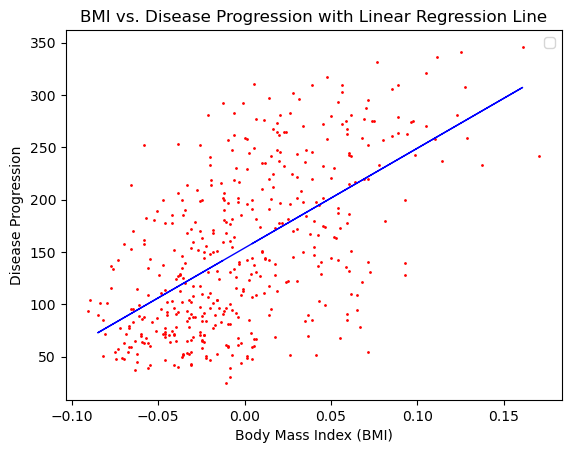

In [11]:
plt.scatter(X, y, color="red",s=1)
plt.plot(X_test, y_pred_test, color="blue", linewidth=1)
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Disease Progression')
plt.title('BMI vs. Disease Progression with Linear Regression Line')
plt.legend()
plt.show()